 #자료출처

중소벤처기업부, Korea AI Manufacturing Platform(KAMP),

CNC머신 AI데이터셋, KAIST(UNIST, 이피엠솔루션즈), 2020.12.14.,
https://kamp-ai.kr

#단계-1 라이브러리 및 데이터 불러오기

#1-1 필요 라이브러리

In [1]:
import pandas as pd
import numpy as np
import keras
import tensorflow

## 1-2 훈련 데이터 불러오기

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
path='/content/gdrive/My Drive/AI_Applied_Manufacturing/11주/온라인/CNC/'
train_sample = pd.read_csv(path+"train.csv", header=0, encoding='utf-8')

#훈련 데이터 불러오기

In [6]:
import glob
path='/content/gdrive/My Drive/AI_Applied_Manufacturing/11주/온라인/CNC/Data/'
all_files = glob.glob(path+"*.csv")
#change data type
train_sample_np = np.array(train_sample.copy())
#load csv file
li_df = []
for filename in all_files:
  df = pd.read_csv(filename, index_col=None, header=0)
  li_df.append(df)

#단계-2 데이터 종류 및 갯수 확인

#2-1 데이터 종류 확인

In [8]:
train_sample

,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,1,aluminum,6,4.0,unworn,yes,yes
1,2,aluminum,20,4.0,unworn,yes,yes
2,3,aluminum,6,3.0,unworn,yes,yes
3,4,aluminum,6,2.5,unworn,no,NaN
4,5,aluminum,20,3.0,unworn,no,NaN
5,6,aluminum,6,4.0,worn,yes,no
6,7,aluminum,20,4.0,worn,no,NaN
7,8,aluminum,20,4.0,worn,yes,no
8,9,aluminum,15,4.0,worn,yes,no
9,10,aluminum,12,4.0,worn,yes,no


In [9]:
df

,X_ActualPosition,X_ActualVelocity,X_ActualAcceleration,X_SetPosition,X_SetVelocity,X_SetAcceleration,X_CurrentFeedback,X_DCBusVoltage,X_OutputCurrent,X_OutputVoltage,...,S_CurrentFeedback,S_DCBusVoltage,S_OutputCurrent,S_OutputVoltage,S_OutputPower,S_SystemInertia,M_CURRENT_PROGRAM_NUMBER,M_sequence_number,M_CURRENT_FEEDRATE,Machining_Process
0,176.0,4.9750,-1.250,176.0,5.0,5.0,-1.420,0.0227,327,0.355,...,0.499,2.710000e-19,327,0.0,0.000003,17,1,2,50,Prep
1,176.0,5.0250,23.775,176.0,5.0,5.0,-1.740,0.0224,327,0.589,...,0.790,2.710000e-19,327,0.0,-0.000003,17,1,0,50,Prep
2,176.0,4.9750,-1.250,176.0,5.0,5.0,0.180,0.0329,327,2.190,...,-1.300,2.710000e-19,327,0.0,-0.000006,17,1,0,50,Prep
3,176.0,4.9625,-13.750,176.0,5.0,5.0,-0.619,0.0198,327,1.010,...,-3.810,2.710000e-19,327,0.0,0.000002,17,1,0,50,Prep
4,176.0,4.9750,-4.400,176.0,5.0,5.0,-0.779,0.0311,327,0.372,...,0.790,2.710000e-19,327,0.0,0.000000,17,1,0,50,Prep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,179.0,3.5625,8.150,179.0,3.5,5.0,-0.941,0.0215,328,1.790,...,0.244,2.770000e-19,328,0.0,-0.000003,17,1,0,20,End
561,178.5,3.5350,30.000,178.5,3.5,5.0,-0.780,0.0202,328,1.070,...,0.244,2.770000e-19,328,0.0,0.000000,17,1,0,20,End
562,178.5,3.5475,17.500,178.5,3.5,5.0,0.501,0.0190,328,0.990,...,0.128,2.770000e-19,328,0.0,0.000000,17,1,0,20,End
563,178.5,3.4475,11.250,178.5,3.5,5.0,-0.298,0.0193,328,1.370,...,0.657,2.770000e-19,328,0.0,-0.000008,17,1,0,20,End


#2-2 데이터 갯수 확인

In [10]:
# count the number of pass/File items
nb_pass = 0
nb_pass_half = 0
nb_defective = 0
for i in range(len(train_sample_np)):
  if train_sample_np[i,5] == 'no':
    nb_defective +=1
  if train_sample_np[i,5] == 'yes' and train_sample_np[i,6] == 'yes':
    nb_pass +=1
  if train_sample_np[i,5] == 'yes' and train_sample_np[i,6] == 'no':
    nb_pass_half +=1

print('양품 샘플 갯수 :', nb_pass)
print('공정 마쳤으나 육안검사 통과 몫한 샘플 갯수 :', nb_pass_half)
print('공정 중지된 샘플 갯수 :', nb_defective)
print('전체 샘플 갯수 :', nb_pass+nb_pass_half+nb_defective)

양품 샘플 갯수 : 13
공정 마쳤으나 육안검사 통과 몫한 샘플 갯수 : 6
공정 중지된 샘플 갯수 : 6
전체 샘플 갯수 : 25


##단계-3 데이터 정제(2차 전처리)

#3-1 사용자 정의 함수 선언

In [11]:
def tool_condition(input):
  for i in range(len(input)):
    if input[i,4] == 'unworn':
      input[i,4] = 0
    else:
      input[i,4] = 1
  return input

In [12]:
def item_inspection(input):
  for i in range(len(input)):
    if input[i,5] == 'no':
      input[i,6] = 2
    elif input[i,5] == 'yes' and input[i,6] == 'no':
      input[i,6] = 1
    elif input[i,5] == 'yes' and input[i,6] == 'yes':
      input[i,6] = 0
  return input

In [13]:
def machining_process(input):
  for i in range(len(input)):
    if input[i,47] == 'Prep':
      input[i,47] = 0
    elif input[i,47] == 'Layer 1 Up':
      input[i,47] = 1
    elif input[i,47] == 'Layer 1 Down':
      input[i,47] = 2
    elif input[i,47] == 'Layer 2 Up':
      input[i,47] = 3
    elif input[i,47] == 'Layer 2 Down':
      input[i,47] = 4
    elif input[i,47] == 'Layer 3 Up':
      input[i,47] = 5
    elif input[i,47] == 'Layer 3 Down':
      input[i,47] = 6
    elif input[i,47] == 'Repositioning':
      input[i,47] = 7
    elif input[i,47] == 'End' or 'end':
      input[i,47] = 8
    elif input[i,47] == 'Starting':
      input[i,47] = 9
  return input

#3-2 사용자 정의 함수의 사용을 통한 데이터 분류

In [14]:
# Modifying train.csv for training
# - [tool_condition] : unworn.worn -> 0 / 1
# - [item_inspection] : machining_finalized & passed -> yes & yes / yes & no / no : 0 / 1 / 2
# - delete 'material' column and 'No' column
train_sample_info = np.array(train_sample_np.copy())
train_sample_info = tool_condition(train_sample_info)
train_sample_info = item_inspection(train_sample_info)
print(train_sample_info)


[[1 'aluminum' 6 4.0 0 'yes' 0]
 [2 'aluminum' 20 4.0 0 'yes' 0]
 [3 'aluminum' 6 3.0 0 'yes' 0]
 [4 'aluminum' 6 2.5 0 'no' 2]
 [5 'aluminum' 20 3.0 0 'no' 2]
 [6 'aluminum' 6 4.0 1 'yes' 1]
 [7 'aluminum' 20 4.0 1 'no' 2]
 [8 'aluminum' 20 4.0 1 'yes' 1]
 [9 'aluminum' 15 4.0 1 'yes' 1]
 [10 'aluminum' 12 4.0 1 'yes' 1]
 [11 'aluminum' 3 4.0 0 'yes' 0]
 [12 'aluminum' 3 3.0 0 'yes' 0]
 [13 'aluminum' 3 4.0 1 'yes' 0]
 [14 'aluminum' 3 3.0 1 'yes' 0]
 [15 'aluminum' 6 3.0 1 'yes' 0]
 [16 'aluminum' 20 3.0 1 'no' 2]
 [17 'aluminum' 3 2.5 0 'yes' 0]
 [18 'aluminum' 3 2.5 1 'yes' 0]
 [19 'aluminum' 15 4.0 1 'yes' 1]
 [20 'aluminum' 12 4.0 0 'no' 2]
 [21 'aluminum' 3 4.0 0 'yes' 1]
 [22 'aluminum' 20 3.0 1 'yes' 0]
 [23 'aluminum' 3 4.0 1 'no' 2]
 [24 'aluminum' 3 3.0 0 'yes' 0]
 [25 'aluminum' 6 2.5 1 'yes' 0]]


In [15]:
train_sample_info = np.delete(train_sample_info,5,1)
train_sample_info = np.delete(train_sample_info,0,1)
train_sample_info = np.delete(train_sample_info,0,1)
print(train_sample_info)

[[6 4.0 0 0]
 [20 4.0 0 0]
 [6 3.0 0 0]
 [6 2.5 0 2]
 [20 3.0 0 2]
 [6 4.0 1 1]
 [20 4.0 1 2]
 [20 4.0 1 1]
 [15 4.0 1 1]
 [12 4.0 1 1]
 [3 4.0 0 0]
 [3 3.0 0 0]
 [3 4.0 1 0]
 [3 3.0 1 0]
 [6 3.0 1 0]
 [20 3.0 1 2]
 [3 2.5 0 0]
 [3 2.5 1 0]
 [15 4.0 1 1]
 [12 4.0 0 2]
 [3 4.0 0 1]
 [20 3.0 1 0]
 [3 4.0 1 2]
 [3 3.0 0 0]
 [6 2.5 1 0]]


In [16]:
m = 0
li_pass = []
li_pass_half = []
li_fail = []
for filename in all_files:
  df = pd.read_csv(filename, index_col=None, header=0)
  print(filename)
  k = filename[-6] + filename[-5]
  k=int(k)
  k=k-1
  print(k)
  if train_sample_info[k,3] == 0:
    li_pass.append(df)
  elif train_sample_info[k,3] == 1:
    li_pass_half.append(df)
  else:
    li_fail.append(df)

  m +=1

print(m)

frame01 = pd.concat(li_pass, axis=0, ignore_index=True)
frame02 = pd.concat(li_pass_half, axis=0, ignore_index=True)
frame03 = pd.concat(li_fail, axis=0, ignore_index=True)
data_pass = np.array(frame01.copy())
data_pass_half = np.array(frame02.copy())
data_fail = np.array(frame03.copy())
print("공정완료 및 육안검사 합격한 전체 데이터 수 :", len(data_pass))
print("공정완료 및 육안검사 불합격한 전체 데이터 수 :", len(data_pass_half))
print("공정 미완료한 전체 데이터 수 :", len(data_fail))

/content/gdrive/My Drive/AI_Applied_Manufacturing/11주/온라인/CNC/Data/experiment_02.csv
1
/content/gdrive/My Drive/AI_Applied_Manufacturing/11주/온라인/CNC/Data/experiment_01.csv
0
/content/gdrive/My Drive/AI_Applied_Manufacturing/11주/온라인/CNC/Data/experiment_03.csv
2
/content/gdrive/My Drive/AI_Applied_Manufacturing/11주/온라인/CNC/Data/experiment_10.csv
9
/content/gdrive/My Drive/AI_Applied_Manufacturing/11주/온라인/CNC/Data/experiment_15.csv
14
/content/gdrive/My Drive/AI_Applied_Manufacturing/11주/온라인/CNC/Data/experiment_05.csv
4
/content/gdrive/My Drive/AI_Applied_Manufacturing/11주/온라인/CNC/Data/experiment_19.csv
18
/content/gdrive/My Drive/AI_Applied_Manufacturing/11주/온라인/CNC/Data/experiment_09.csv
8
/content/gdrive/My Drive/AI_Applied_Manufacturing/11주/온라인/CNC/Data/experiment_04.csv
3
/content/gdrive/My Drive/AI_Applied_Manufacturing/11주/온라인/CNC/Data/experiment_14.csv
13
/content/gdrive/My Drive/AI_Applied_Manufacturing/11주/온라인/CNC/Data/experiment_18.csv
17
/content/gdrive/My Drive/AI_Applied_Man

In [17]:
print(data_pass.shape)
print(data_pass_half.shape)
print(data_fail.shape)

(22645, 48)
(6175, 48)
(3228, 48)


In [18]:
# Modifying experiment data
# - machining_process : From "Prep" to "End" -> 0-9
data_pass = machining_process(data_pass)
data_pass_half = machining_process(data_pass_half)
data_fail = machining_process(data_fail)

#3-3 데이터셋 구성

In [19]:
# label 0/1 --> data01 /data02 + data03
# 검토 필요
data01 = data_pass[0:3228+6175,:]
data02 = data_pass_half[0:6175,:]
data03 = data_fail[0:3228,:]
data = np.concatenate((data01,data02),axis=0);
data = np.concatenate((data,data03),axis=0);
data_all = data_pass[3228+6175:22645,:]

print((data))
print(data.shape)
print(data_all.shape)

[[202.0 4.0 4.0 ... 2 50 0]
 [202.0 4.0 4.0 ... 0 50 0]
 [202.0 4.0 4.0 ... 0 50 0]
 ...
 [155.0 9.875 -64.6 ... 0 50 8]
 [155.5 9.95 -52.125 ... 0 50 8]
 [156.0 10.1 76.125 ... 0 50 8]]
(18806, 48)
(13242, 48)


#3-4 데이타 정제(2차 전처리)

In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(data)
X_train = np.array(X_train)
X_test = sc.fit_transform(data_all)
X_test = np.array(X_test)
print(X_train.shape)
print(X_test.shape)

(18806, 48)
(13242, 48)


#단계-4 데이터 라벨링

In [21]:
# make lebel data
Y_train = np.zeros((len(X_train),1), dtype='int')
Y_test = np.zeros((len(X_test),1), dtype='int')
I = int(Y_train.shape[0]/2)
Y_train[0:I,:]=0
Y_train[I:,:]=1
print(Y_train)
print(Y_test)

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


#단계-5 학습/검증/평가 데이터 분리

In [22]:
nb_classes = 2
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
Y_train = keras.utils.to_categorical(Y_train, nb_classes)
Y_test = keras.utils.to_categorical(Y_test, nb_classes)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(18806, 48)
(13242, 48)
(18806, 2)
(13242, 2)


#단계-6 AI 모델 구축

In [23]:
keras.backend.clear_session()
tensorflow.random.set_seed(42)
np.random.seed(42)

from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(128,activation='relu',input_dim = 48))
model.add(Dropout(0.3))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(nb_classes,activation='softmax'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 598,018 (2.28 MB)

 Trainable params: 598,018 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
from keras.optimizers import Adam

mc = keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)
ec = keras.callbacks.EarlyStopping(patience=10)
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
print("..............model is defined............")

..............model is defined............


#단계-7 AI 모델 훈련

In [25]:
history =model.fit(X_train, Y_train, verbose=2, batch_size=128, epochs=200, validation_split=0.1, shuffle=True, callbacks =[mc,ec])

Epoch 1/200
133/133 - 6s - 44ms/step - accuracy: 0.5778 - loss: 0.6734 - val_accuracy: 0.6364 - val_loss: 0.6669
Epoch 2/200
133/133 - 3s - 22ms/step - accuracy: 0.6791 - loss: 0.6005 - val_accuracy: 0.9750 - val_loss: 0.3904
Epoch 3/200
133/133 - 5s - 34ms/step - accuracy: 0.7609 - loss: 0.4913 - val_accuracy: 0.9936 - val_loss: 0.3038
Epoch 4/200
133/133 - 3s - 26ms/step - accuracy: 0.8059 - loss: 0.4244 - val_accuracy: 1.0000 - val_loss: 0.2606
Epoch 5/200
133/133 - 3s - 21ms/step - accuracy: 0.8286 - loss: 0.3820 - val_accuracy: 1.0000 - val_loss: 0.1932
Epoch 6/200
133/133 - 3s - 22ms/step - accuracy: 0.8493 - loss: 0.3486 - val_accuracy: 0.9995 - val_loss: 0.1467
Epoch 7/200
133/133 - 5s - 34ms/step - accuracy: 0.8653 - loss: 0.3198 - val_accuracy: 0.9856 - val_loss: 0.1491
Epoch 8/200
133/133 - 3s - 22ms/step - accuracy: 0.8763 - loss: 0.2953 - val_accuracy: 0.9995 - val_loss: 0.0931
Epoch 9/200
133/133 - 3s - 21ms/step - accuracy: 0.8895 - loss: 0.2660 - val_accuracy: 0.9979 - 

#단계-8 결과 분석 및 해석

In [26]:
best_model = keras.models.load_model("best_model.keras")
loss_and_metrics = best_model.evaluate(X_train, Y_train)
print(loss_and_metrics)
loss_and_metrics2 = best_model.evaluate(X_test, Y_test)
print(loss_and_metrics2)

588/588 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8934 - loss: 0.2279
[0.1251658797264099, 0.9500159621238708]
414/414 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9383 - loss: 0.1282
[0.3863103687763214, 0.8843075037002563]


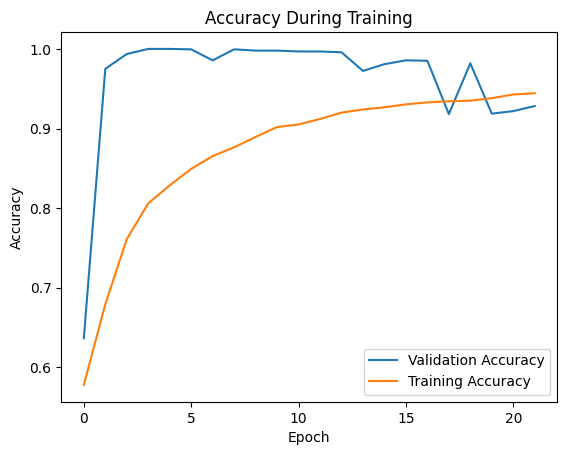

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Accuracy During Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Validation Accuracy','Training Accuracy'])

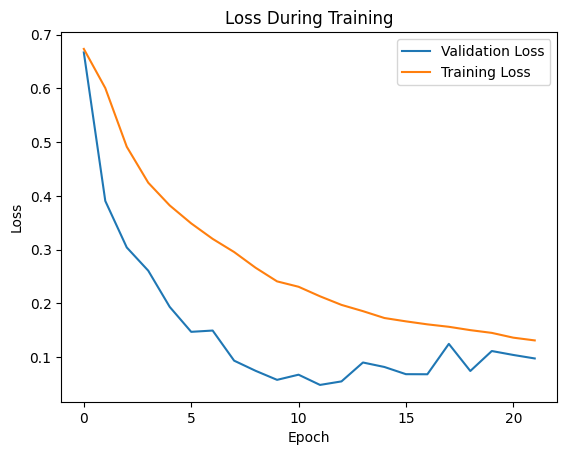

In [28]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Validation Loss','Training Loss'])

In [29]:
from sklearn.metrics import confusion_matrix

#Predict
y_prediction = best_model.predict(X_test)
y_prediction = np.argmax (y_prediction, axis = 1)
accuracy = (len(y_prediction)-np.sum(y_prediction))/len(y_prediction)
print('accuracy = ', accuracy)

414/414 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
accuracy =  0.8843075064189699
